# corner detection

In [1]:
import numpy as np
import cv2
circles_center=[]
img = cv2.imread('realTime.jpg', cv2.IMREAD_COLOR)
  
# Convert to grayscale.
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
  
# Blur using 3 * 3 kernel.
gray_blurred = cv2.blur(gray, (3, 3))
  
# Apply Hough transform on the blurred image.
detected_circles = cv2.HoughCircles(gray_blurred, 
                   cv2.HOUGH_GRADIENT, 1, 20, param1 = 60,
               param2 = 30, minRadius = 0, maxRadius = 40)
  
# Draw circles that are detected.
if detected_circles is not None:
  
    # Convert the circle parameters a, b and r to integers.
    detected_circles = np.uint16(np.around(detected_circles))
  
    for pt in detected_circles[0, :]:
        a, b, r = pt[0], pt[1], pt[2]
  
        # Draw the circumference of the circle.
        cv2.circle(img, (a, b), r, (0, 255, 0), 2)
        circles_center.append([a, b])
  
        # Draw a small circle (of radius 1) to show the center.
        cv2.circle(img, (a, b), 1, (255, 0, 0), 3)
cv2.imshow("Detected Circle", img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [2]:
a = sorted(circles_center, key=lambda x:x[1])
circles_center_upper_section = a[0:2]
circles_center_lower_section = a[-2:]
circles_center_upper_section.sort()
circles_center_lower_section.sort()

In [3]:
img = cv2.imread('realTime.jpg', cv2.IMREAD_COLOR)

width = 425
height = 425
dstPts = [[0, 0], [width, 0], [width, height], [0, height]]
intersect_pts = np.array([circles_center_upper_section[0],circles_center_upper_section[1],
                          circles_center_lower_section[1], circles_center_lower_section[0]])
intersect_pts = np.float32(intersect_pts)
m = cv2.getPerspectiveTransform(np.float32(intersect_pts), np.float32(dstPts))
out = cv2.warpPerspective(img, m, (int(width), int(height)))
cv2.imshow('ds32', out)
cv2.imwrite('fitted_view.jpg', out)

cv2.imshow('dst2', img)
cv2.waitKey(0)
cv2.destroyAllWindows()


In [4]:
import pandas as pd
import cv2
import numpy as np
import matplotlib.pyplot as plt

## point detection using goodFeaturseToTrack

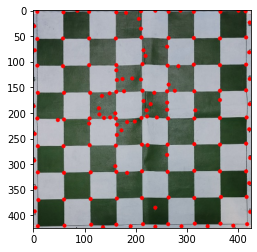

In [5]:
import numpy as np
import cv2
%matplotlib inline

img = cv2.imread('fitted_view.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

corners = cv2.goodFeaturesToTrack(gray, 150, 0.0001, 10)
corners = np.int0(corners)

for corner in corners:
    x, y = corner.ravel()
    cv2.circle(img, (x, y), 4, (255, 0, 0), -1)


plt.imshow(img)

In [6]:
corners = corners.reshape(150,2)
dist = (corners[:,0] **2 + corners[:,1]**2)**0.5
x_min, y_min = corners[dist==dist.min()][0]
x_max, y_max = corners[dist==dist.max()][0]

In [7]:
diag = ((x_max - x_min)**2 + (y_max-y_min)**2)**0.5
cell_length = (diag/np.sqrt(2)) / 8

In [8]:
def cell2Cord(cellName,cellLength):
    x_cord = ord(cellName[0]) - 96 - 0.5
    y_cord = 9 - int(cellName[1]) - 0.5
    return np.array([round(x_cord*cell_length), round(y_cord*cellLength)])

img = cv2.imread('fitted_view.jpg')
img = cv2.circle(img, cell2Cord("b3",cell_length), radius=3, color=(0, 0, 255), thickness=-1)
cv2.imshow('dst', img)
cv2.waitKey(0)
cv2.destroyAllWindows()